# <center>**Customer Click Prediction with Machine Learning 📈**</center>

<center>

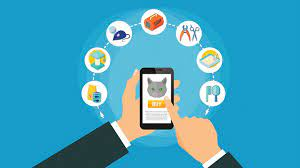

</center>

**Project Description:**

In this project, we will leverage the power of Google Colab to build a machine learning model that predicts customer clicks on digital advertisements. We aim to understand customer behavior patterns and demographics that influence ad engagement. By the end of this project, you will have a working notebook that preprocesses data and sets up the foundation for machine learning modeling.

---

## **Business Statement:**
Our company, operating in the digital marketing sector, is eager to enhance its marketing strategies and optimize advertising campaigns. To achieve this, we aim to gain valuable insights into customer behavior patterns when using the internet. Specifically, we want to understand how various factors, such as the time customers spend on our website and their demographics, influence their engagement with our digital advertisements.


## **Project Objective:**
The primary objective of this project is to develop a machine learning model that predicts whether a customer will click on our digital advertisements based on their behavior and demographic information. By achieving this, we can:

* 🔎 Optimize Marketing Strategies: Tailor our marketing efforts to target customers who are more likely to engage with our ads, thus improving the efficiency of our campaigns.

* 📊 Understand Customer Demographics: Identify which age groups are more inclined to click on our ads, allowing us to create more relevant and targeted content.

* 💡 Enhance User Experience: Improve the overall user experience on our website by tailoring content to suit the preferences and behaviors of our target audience.


## **Data Source:**
We will utilize historical customer data collected during previous advertising campaigns, which includes information on customer behavior (e.g., Clicked on Ad) and demographics (e.g., age and gender).



## **Project Deliverables:**

* 📓 A Google Colab notebook containing the code for data preprocessing, model building, and evaluation.
* 🤖 A machine learning model capable of predicting customer clicks on advertisements.
* 📊 Insights and visualizations highlighting customer behavior patterns and demographic trends.
* 🚀 Recommendations for optimizing marketing strategies based on model findings.


## **Project Timeline:**
This project is expected to be completed within ⏰ about a week. The timeline includes data collection, preprocessing, model development, and testing.

---

#Import Library

In [ ]:
#for manipulating data
import pandas as pd
import numpy as np

#for the visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for the statistical summary
import math
from scipy import stats

#for the modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

#Access to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ganti dengan path dataset Anda di Google Drive
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Clicked Ads Dataset.csv'

# Baca dataset dengan pandas
df = pd.read_csv(dataset_path)

#**Data Understanding**

Welcome to the **"Data Understanding"** phase. In this stage, we'll dig deep into our dataset, identify patterns, assess data quality, and set the stage for modeling. Let's begin our journey to unlock valuable insights!


## Info of The Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [ ]:
df.shape

(1000, 11)

It looks like the data provided a snippet of a DataFrame with information about columns, non-null counts, and data types. This is commonly seen when examining the data during the data understanding phase of a project. Here's a brief interpretation of the information:

* **Unnamed: 0:** An index or identifier column with 1000 non-null integer values.

* **Daily Time Spent on Site:** Contains 987 non-null float64 values, representing the average daily time spent on the website.

* **Age:** Contains 1000 non-null integer values, likely representing the age of users.

* **Area Income:** Contains 987 non-null float64 values, which may represent the income level of users in different areas.

* **Daily Internet Usage:** Contains 989 non-null float64 values, representing the average daily internet usage by users.

* **Male:** Contains 997 non-null object values, possibly indicating the gender of users.

* **Timestamp:** Contains 1000 non-null object values, which are typically timestamps or dates.

* **Clicked on Ad:** Contains 1000 non-null object values, possibly indicating whether a user clicked on an advertisement (binary: "Yes" or "No").

* **city:** Contains 1000 non-null object values, indicating the city where users are located.

* **province:** Contains 1000 non-null object values, likely indicating the province or region of users.

* **category:** Contains 1000 non-null object values, representing a categorical variable or category.


This information provides an initial understanding of the columns and their data types. Further exploration and preprocessing are typically required before building predictive models or gaining deeper insights from the data.

## Unique Values on Each Every Columns

In [ ]:
# Loop through each column
for column_name in df.columns:
    unique_values = df[column_name].unique()
    unique_values_str = ", ".join(map(str, unique_values))

    print(f"Unique values in '{column_name}':\n == {unique_values_str} == \n")

Unique values in 'Unnamed: 0':
 == 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 

# **Exploratory Data Analysis**

EDA is our compass in navigating the data landscape. We uncover patterns, evaluate quality, visualize trends, and lay the groundwork for informed decisions. Explore Data, Recognize Patterns, Assess Quality, Visualize.

## Statistical Summary

In [ ]:
#first let's separate the numerical and categorical columns
numerical_feature = ['Daily Time Spent on Site', 'Age', 'Area Income' , 'Daily Internet Usage']

categorical_feature = ['Male', 'city', 'province', 'category']

In [ ]:
df[numerical_feature].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


In [ ]:
df[categorical_feature].describe()

,Male,city,province,category
count,997,1000,1000,1000
unique,2,30,16,10
top,Perempuan,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,64,253,112


## Univariate Analysis

###Numerical Columns Analysis

In [ ]:
# Initialize an empty DataFrame to store results
result_df = pd.DataFrame(columns=['Column Name', 'Skewness', 'Kurtosis', 'Type of Distribution'])


# Loop through numeric columns
for column in numerical_feature:
    data = df[column].dropna()  # Drop missing values (NaN)

    # Calculate skewness and kurtosis
    skewness = data.skew()
    kurtosis_val = data.kurtosis()

    # Determine the type of distribution
    distribution_type = None

    if -0.5 <= skewness <= 0.5:
        distribution_type = "Approximately Symmetrical (Nearly Normal)"
    elif skewness < -1.0:
        distribution_type = "Highly Negatively Skewed"
    elif skewness > 1.0:
        distribution_type = "Highly Positively Skewed"
    elif -1.0 <= skewness < -0.5:
        distribution_type = "Moderately Negatively Skewed"
    elif 0.5 < skewness <= 1.0:
        distribution_type = "Moderately Positively Skewed"

    # Update the results DataFrame
    result_df = result_df.append({'Column Name': column,
                                  'Skewness': round(skewness, 3),
                                  'Kurtosis': round(kurtosis_val, 3),
                                  'Type of Distribution': distribution_type}, ignore_index=True)

In [ ]:
result_df

,Column Name,Skewness,Kurtosis,Type of Distribution
0,Daily Time Spent on Site,-0.370,-1.099,Approximately Symmetrical (Nearly Normal)
1,Age,0.479,-0.401,Approximately Symmetrical (Nearly Normal)
2,Area Income,-0.644,-0.115,Moderately Negatively Skewed
3,Daily Internet Usage,-0.031,-1.277,Approximately Symmetrical (Nearly Normal)


For numerical features like **"Daily Time Spent on Site,"** **"Age,"** **"Area Income,"** and **"Daily Internet Usage,"** address skewness using appropriate transformations, like log or square root. This aids in achieving more symmetric distributions, enhancing modeling accuracy.

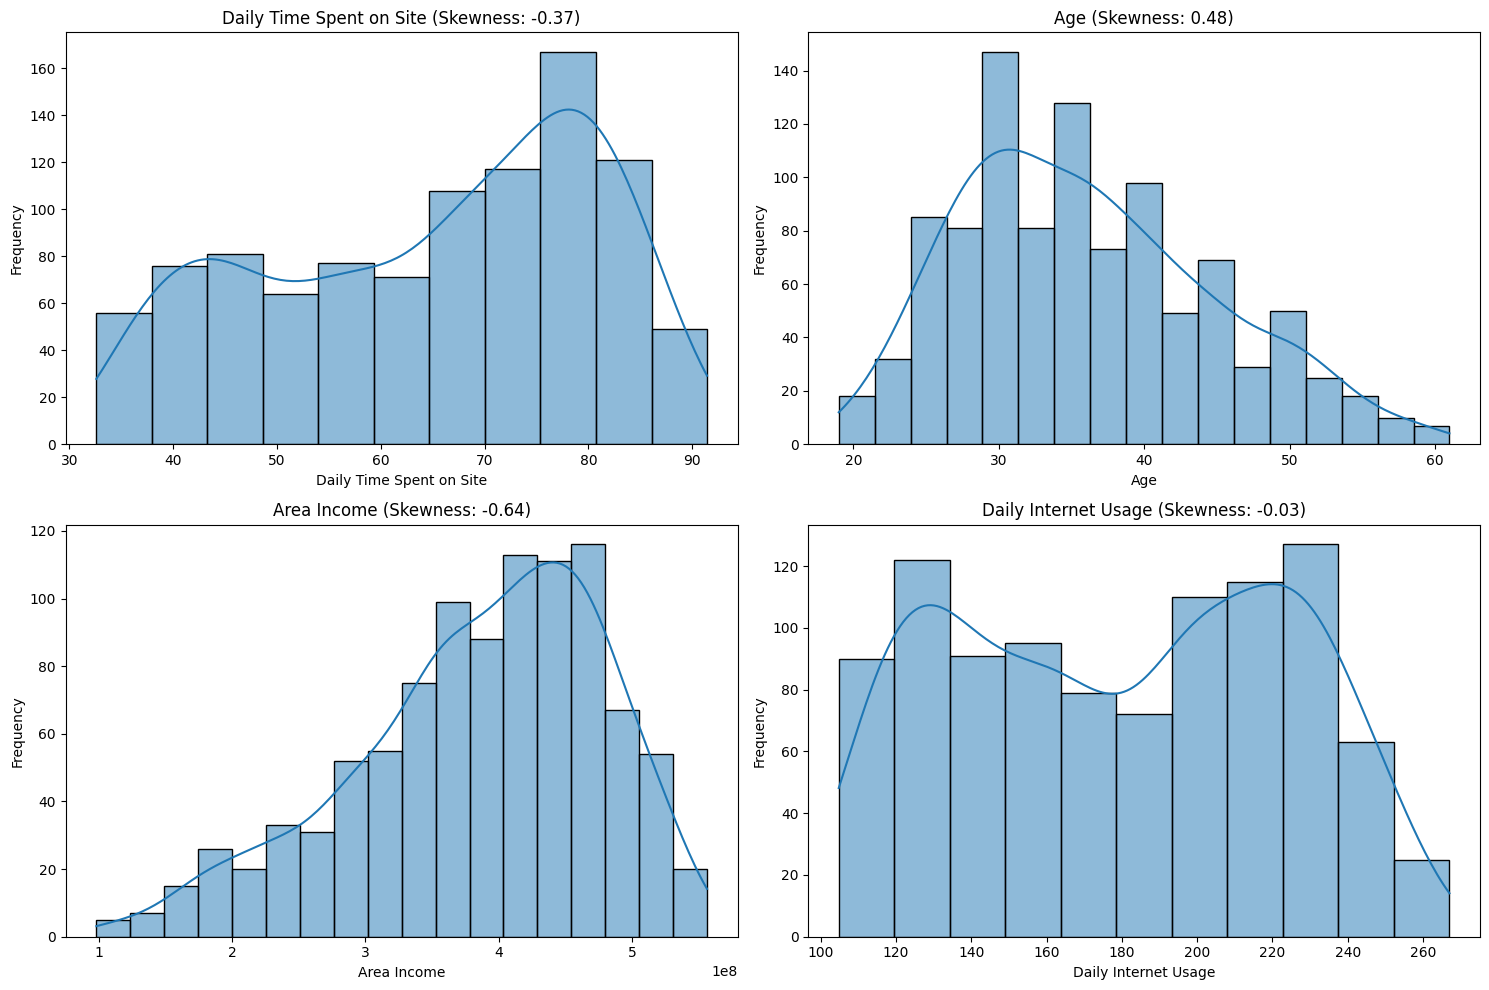

In [ ]:
# Create subplots in a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numerical feature column
for i, column_name in enumerate(numerical_feature):
    skewness = df[column_name].skew()

    # Create a distribution plot
    sns.histplot(data=df, x=column_name, kde=True, ax=axes[i])
    axes[i].set_title(f'{column_name} (Skewness: {skewness:.2f})')
    axes[i].set_xlabel(column_name)
    axes[i].set_ylabel('Frequency')

# Hide any empty subplots
for i in range(len(numerical_feature), 4):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# Initialize a DataFrame to store quartiles and IQR
quartiles_df = pd.DataFrame(columns=['Feature', 'Q1', 'Q3', 'IQR'])
# Initialize a dictionary to store the results
outliers = {}

# Loop through each numerical feature column
for column_name in numerical_feature:
    # Calculate the first quartile (Q1)
    Q1 = df[column_name].quantile(0.25)

    # Calculate the third quartile (Q3)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Add data to the quartiles DataFrame
    quartiles_df = quartiles_df.append({'Feature': column_name, 'Q1': Q1, 'Q3': Q3, 'IQR': IQR}, ignore_index=True)

# Display the quartiles and IQR table
quartiles_df

,Feature,Q1,Q3,IQR
0,Daily Time Spent on Site,5.127000e+01,7.846000e+01,2.719000e+01
1,Age,2.900000e+01,4.200000e+01,1.300000e+01
2,Area Income,3.286330e+08,4.583554e+08,1.297225e+08
3,Daily Internet Usage,1.387100e+02,2.187900e+02,8.008000e+01


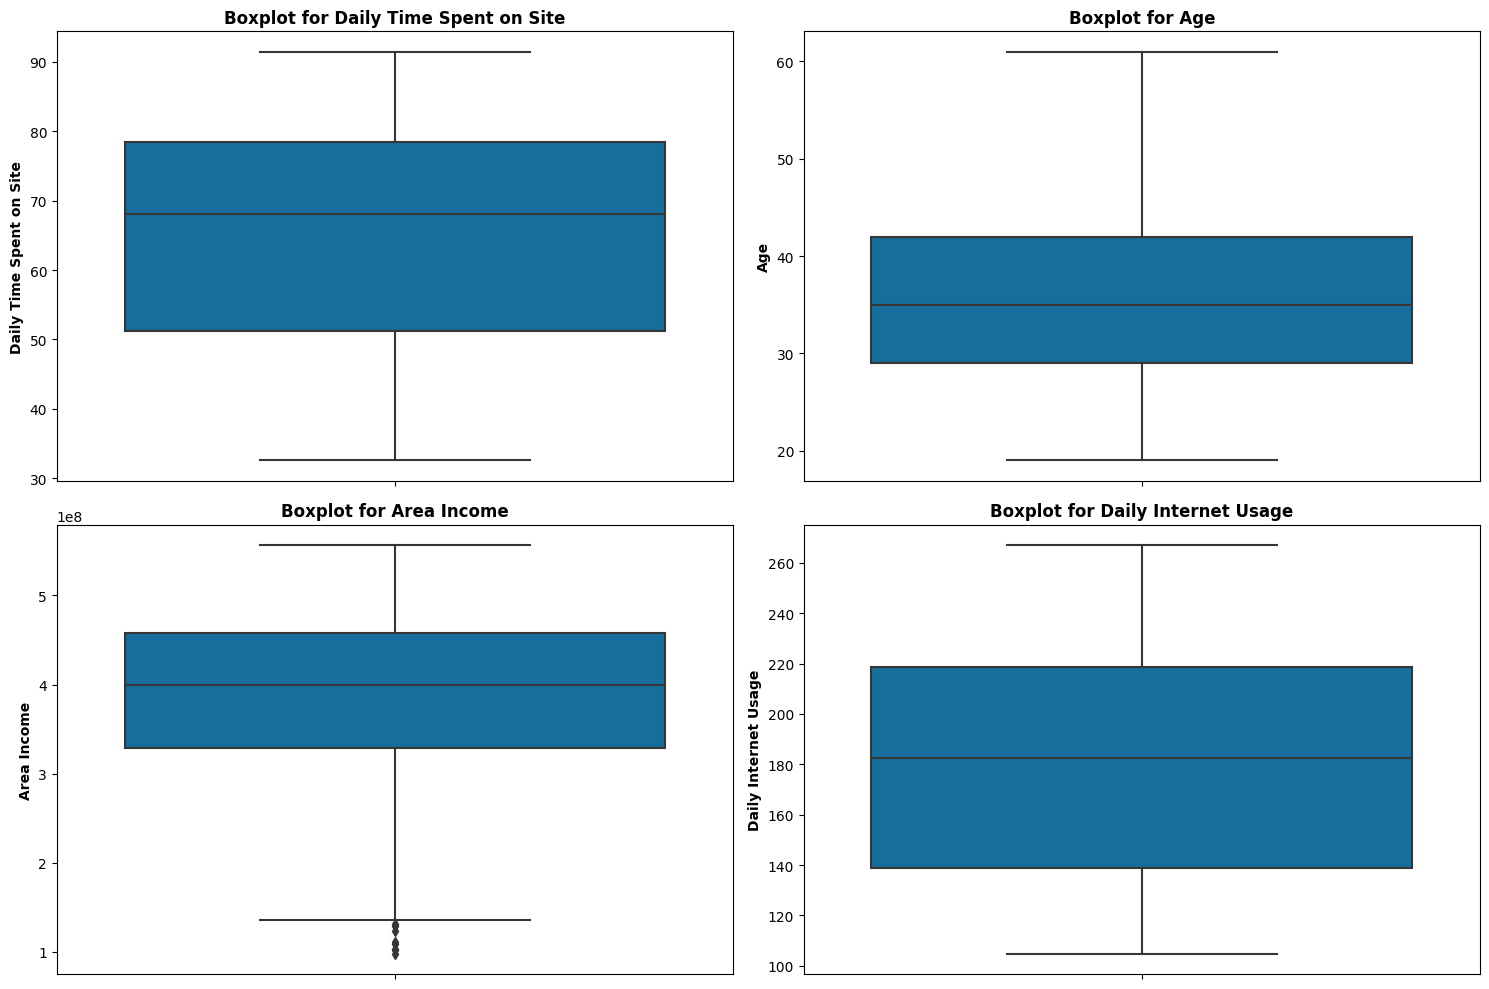

In [ ]:
# Set a colorblind-friendly palette
palette = sns.color_palette("colorblind")

# Create subplots in a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numerical feature column
for i, column_name in enumerate(numerical_feature):
    # Create a vertical boxplot with the specified palette
    sns.boxplot(data=df, y=column_name, ax=axes[i], palette=palette)
    axes[i].set_title(f'Boxplot for {column_name}', fontweight='bold')
    axes[i].set_ylabel(column_name, fontweight='bold')
    axes[i].set_xlabel('')

# Hide any empty subplots
for i in range(len(numerical_feature), 4):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Categorical Columns Analysis

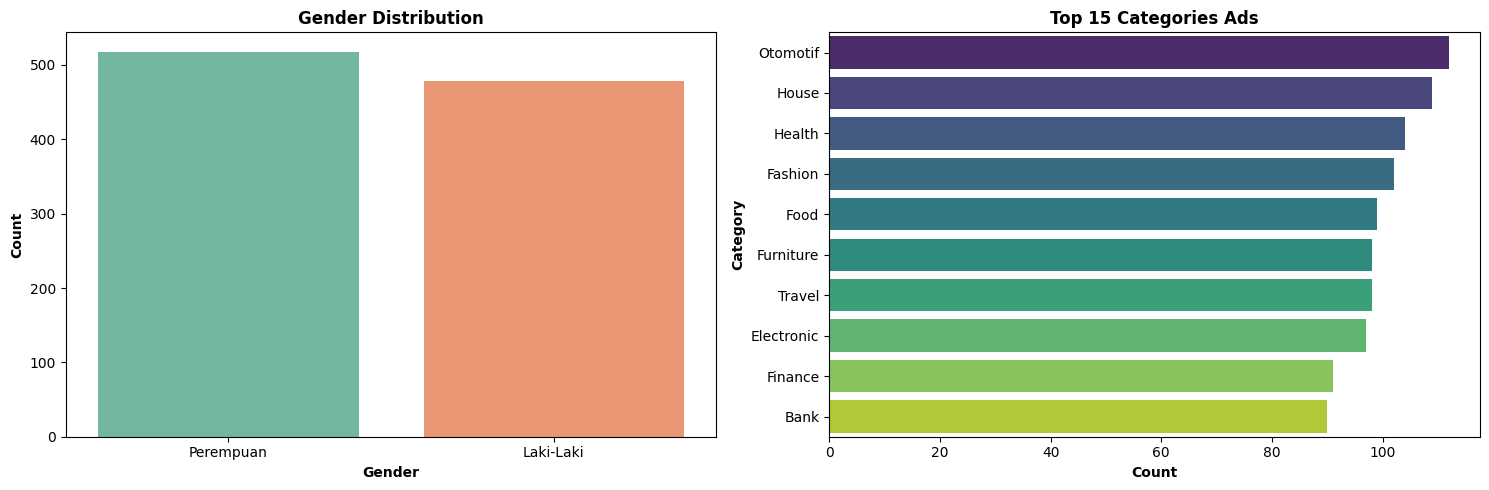

In [ ]:
# Create subplots for Gender and Category
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Categorical plot for Gender
sns.countplot(data=df, x='Male', palette='Set2', ax=axes[0])
axes[0].set_title('Gender Distribution', fontweight='bold')
axes[0].set_xlabel('Gender', fontweight='bold')
axes[0].set_ylabel('Count', fontweight='bold')

# Categorical plot for Category (showing the top 15)
top_categories = df['category'].value_counts().head(15)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis', ax=axes[1])
axes[1].set_title('Top 15 Categories Ads', fontweight='bold')
axes[1].set_xlabel('Count', fontweight='bold')
axes[1].set_ylabel('Category', fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

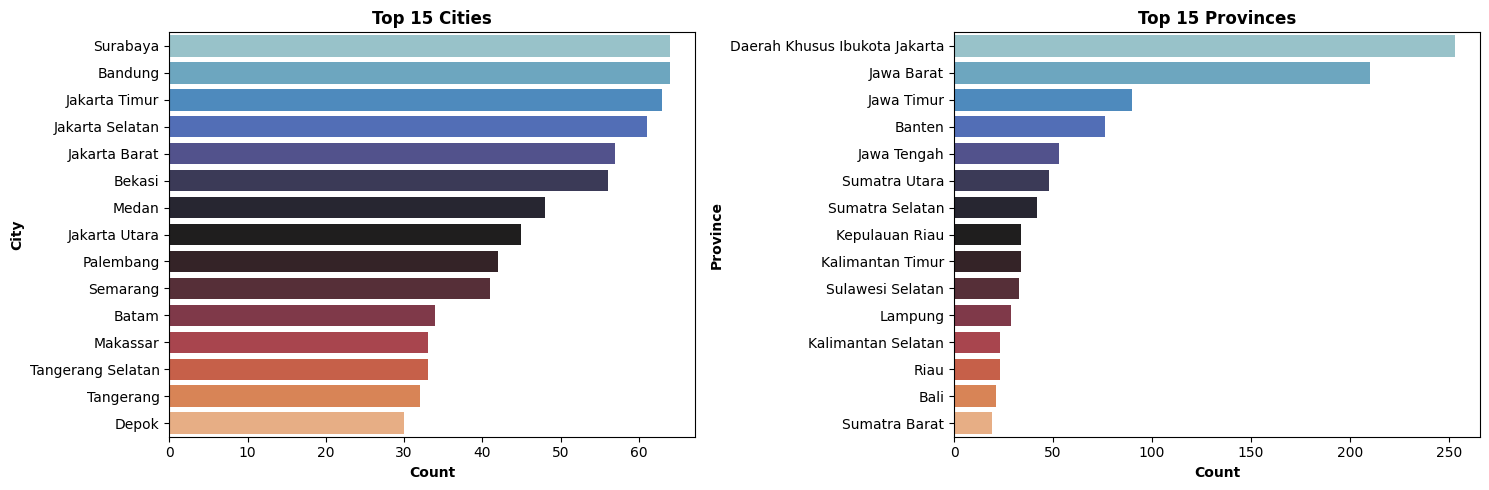

In [ ]:
# Create subplots for City and Province (showing the top 15)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Top 15 City plot
top_cities = df['city'].value_counts().head(15)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='icefire', ax=axes[0])
axes[0].set_title('Top 15 Cities', fontweight='bold')
axes[0].set_xlabel('Count', fontweight='bold')
axes[0].set_ylabel('City', fontweight='bold')

# Top 15 Province plot
top_provinces = df['province'].value_counts().head(15)
sns.barplot(x=top_provinces.values, y=top_provinces.index, palette='icefire', ax=axes[1])
axes[1].set_title('Top 15 Provinces', fontweight='bold')
axes[1].set_xlabel('Count', fontweight='bold')
axes[1].set_ylabel('Province', fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# Map 'Male' values to binary (1 for Male, 0 for Female)
df['Male'] = df['Male'].map({'Laki-Laki': 1, 'Perempuan': 0})

# Calculate the percentage distribution of genders
male_percentage = (df['Male'] == 1).mean() * 100
female_percentage = 100 - male_percentage

# Count the number of NaN values in the 'Male' column
nan_count = df['Male'].isna().sum()

# Display the gender distribution and NaN count
print("🌟 Gender Distribution 🌟")
print("------------------------")
print(f"Male : {male_percentage:.1f}%")
print(f"Female : {female_percentage:.1f}%")
print(f"NaN (Missing) : {nan_count} ({(nan_count / len(df)) * 100:.1f}%)")

# Print a cool summary
print("\n🚀 Total Users: 1000")
print("------------------------")

🌟 Gender Distribution 🌟
------------------------
Male : 47.9%
Female : 52.1%
NaN (Missing) : 3 (0.3%)

🚀 Total Users: 1000
------------------------


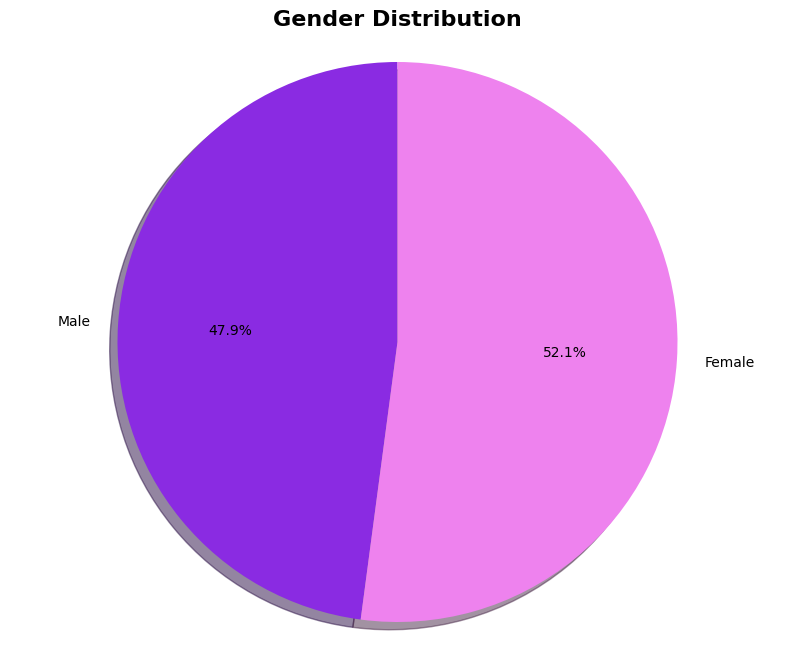

In [ ]:
# Sample data for pie chart
gender_counts = [male_percentage, female_percentage]
labels = ['Male', 'Female']
colors = ['blueviolet', 'violet']

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)
plt.title('Gender Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

##Biavarate analysis

###Heatmap analysis

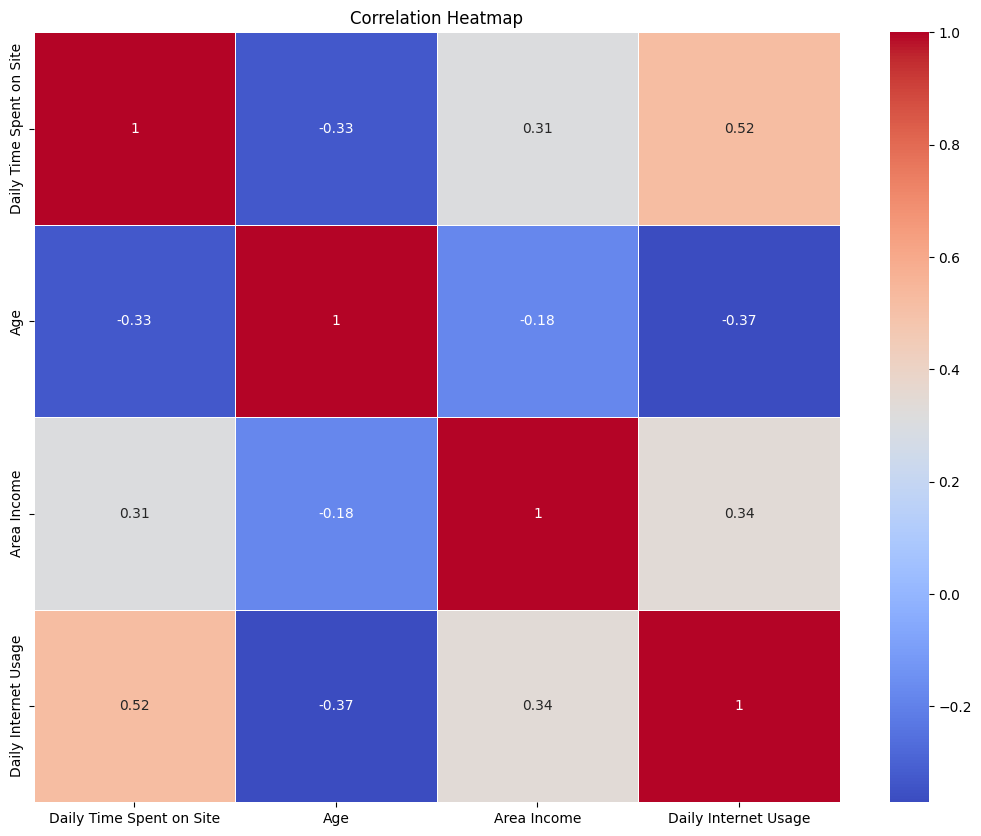

In [ ]:
# Create a heatmap
correlation_matrix = df[numerical_feature].corr()
plt.figure(figsize=(13, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Correlation Analysis

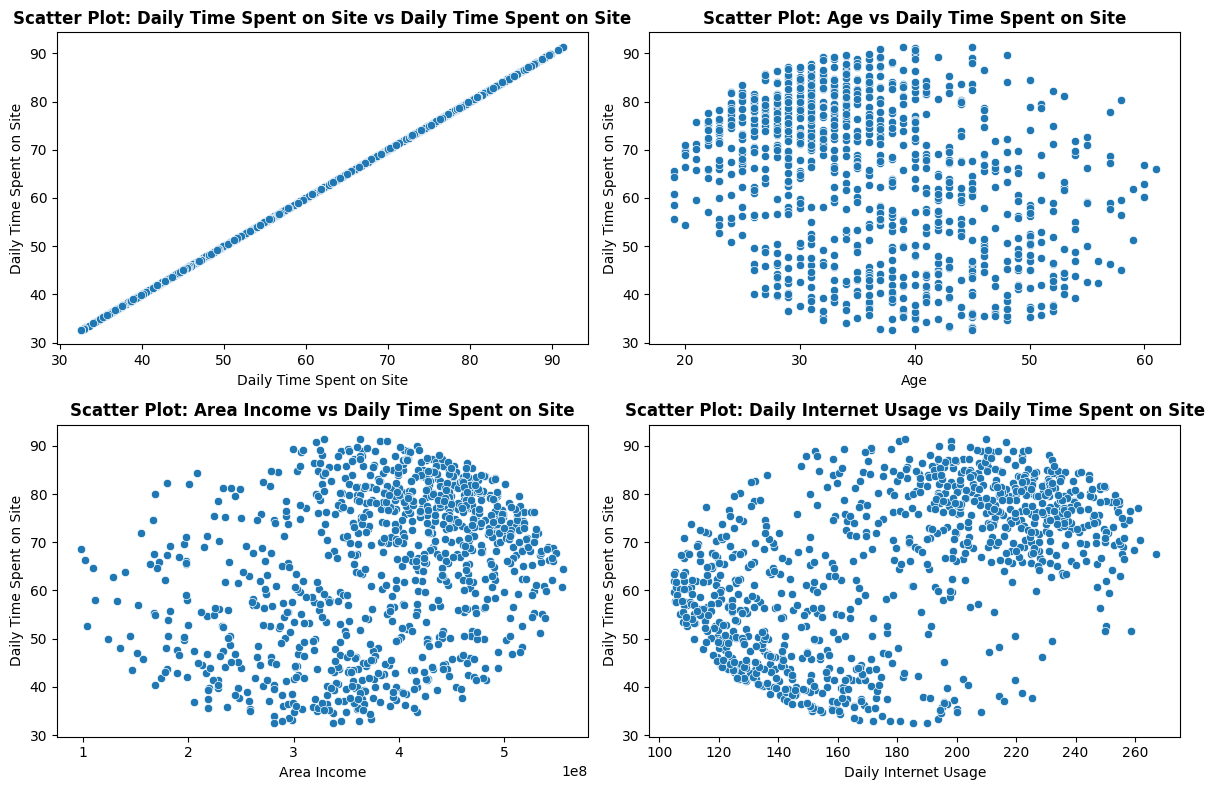

In [ ]:
# Get the numerical feature columns (excluding 'Daily Time Spent on Site')
numerical_features = df.drop(columns='Daily Time Spent on Site').columns

# Calculate the number of subplots needed
num_plots = len(numerical_feature)
num_rows = math.ceil(num_plots / 2)  # Calculate the number of rows needed

# Create subplots in a dynamic grid
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 8))

# Set the "icefire" palette
sns.color_palette("icefire", as_cmap=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numerical feature column
for i, column_name in enumerate(numerical_feature):
    sns.scatterplot(x=column_name, y='Daily Time Spent on Site', data=df, ax=axes[i])
    axes[i].set_title(f'Scatter Plot: {column_name} vs Daily Time Spent on Site', fontweight = 'bold')
    axes[i].set_xlabel(column_name)
    axes[i].set_ylabel('Daily Time Spent on Site')

# Hide any empty subplots
for i in range(num_plots, num_rows * 2):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

summary for the all the correlation columns above:

* **Daily Time Spent on Site vs. Age**: Negative correlation (-0.3314). Younger users tend to spend more time on the site.

* **Daily Time Spent on Site vs. Area Income**: Positive correlation (0.3083). Users from higher-income areas spend slightly more time on the site.

* **Daily Time Spent on Site vs. Daily Internet Usage**: Strong positive correlation (0.5183). More time on the site is associated with higher daily internet usage.

* **Age vs. Area Income**: Negative correlation (-0.1793). Younger users often reside in lower-income areas.

* **Age vs. Daily Internet Usage**: Negative correlation (-0.3705). Younger users have higher daily internet usage.

* **Area Income vs. Daily Internet Usage**: Positive correlation (0.3381). Higher area income relates to higher daily internet usage.

* **Strongest Correlation**: Daily Time Spent on Site and Daily Internet Usage (0.5183). A strong positive relationship exists.

* **Age vs. Daily Time Spent on Site**: Negative correlation (-0.3314). Older users spend less time on the site.


In summary, user engagement is positively linked to internet usage, with younger users being more active. Additionally, users from higher-income areas tend to engage more with the site. However, age and area income are negatively related, suggesting that younger users often reside in lower-income areas. These insights can inform marketing strategies and target demographic

# **🧹 Data Cleaning & Preprocessing 🛠️**

In this essential phase, we'll roll up our sleeves and get the data ready for analysis! Data cleaning and preprocessing involve tasks like handling missing values, encoding categorical variables, and scaling features. It's like preparing the canvas before painting a masterpiece 🎨—ensuring our data is pristine and ready for insightful analysis! Let's clean it up and get ready to unveil hidden patterns 🕵️.

In [ ]:
df_clean = df.copy()

##Checking Missing Values

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display missing percentages
missing_data = pd.DataFrame({'Column': df.columns, 'Missing Percentage': missing_percentage})

# Remove duplicate column names
missing_data = missing_data.drop_duplicates(subset='Column')

# Sort the DataFrame by missing percentage in descending order
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)

# Display the summary
print(missing_data)

                                            Column  Missing Percentage
Daily Time Spent on Site  Daily Time Spent on Site                 1.3
Area Income                            Area Income                 1.3
Daily Internet Usage          Daily Internet Usage                 1.1
Male                                          Male                 0.3
Unnamed: 0                              Unnamed: 0                 0.0
Age                                            Age                 0.0
Timestamp                                Timestamp                 0.0
Clicked on Ad                        Clicked on Ad                 0.0
city                                          city                 0.0
province                                  province                 0.0
category                                  category                 0.0


###Visualize the Missing Values

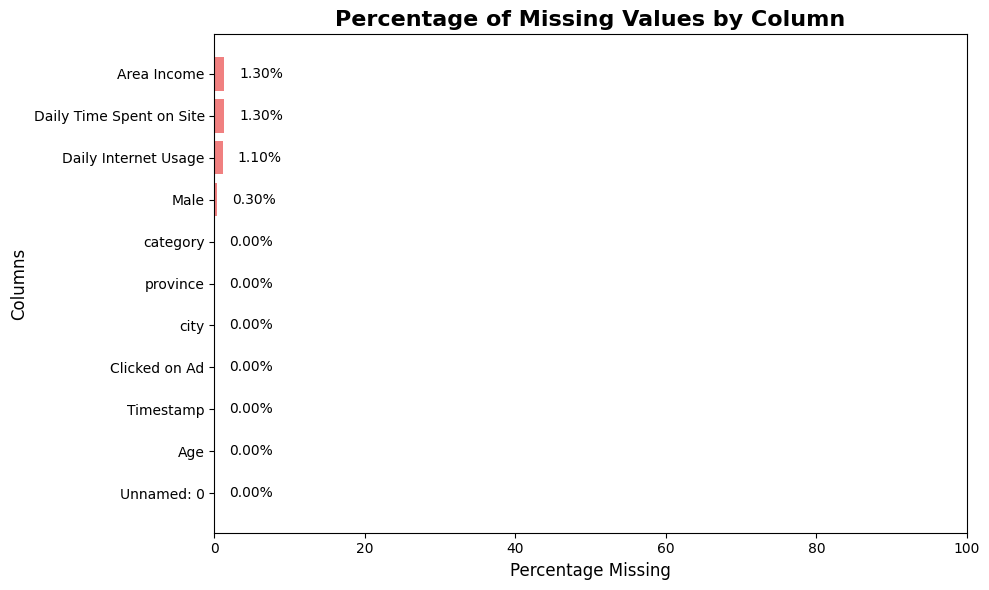

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Sort the missing_percentage Series in descending order
missing_percentage = missing_percentage.sort_values(ascending=True)

# Create a vertical column chart for missing values
plt.figure(figsize=(10, 6))
plt.barh(missing_percentage.index, missing_percentage.values, color='lightcoral')  # Use barh for horizontal chart
plt.title('Percentage of Missing Values by Column', fontsize=16, fontweight='bold')
plt.xlabel('Percentage Missing', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.xlim(0, 100)  # Set x-axis limit to 0-100 for percentages
plt.tight_layout()

# Add labels to the bars
for i, value in enumerate(missing_percentage.values):
    plt.text(value + 2, i, f'{value:.2f}%', va='center', fontsize=10)

plt.show()

**Daily Time Spent on Site, Area Income, and Daily Internet Usage**: These columns have a small percentage of missing values (around 1%). We can consider imputing these missing values with appropriate central tendencies such as the mean or median of the respective columns.

**Male**: This column has a very low percentage of missing values (0.3%). We can consider imputing the missing values with the mode (most frequent category) since it's a categorical variable.

##Cleaning the NULL Values

In [ ]:
# Remove rows with missing values in the specified columns
df_clean = df_clean.dropna(subset=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male'])

# Reset the index after removing rows
df_clean.reset_index(drop=True, inplace=True)

# Reset the index after removing rows
df_clean.reset_index(drop=True, inplace=True)

##Cleaning the Duplicate Data

In [ ]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df_clean[df_clean.duplicated()]

# Display the duplicate rows, if any
print("Duplicate Rows:")
print(duplicate_rows)

# Remove duplicate rows from the DataFrame
df_clean = df_clean.drop_duplicates()

# Reset the index after removing duplicates
df_clean.reset_index(drop=True, inplace=True)

Duplicate Rows:
Empty DataFrame
Columns: [Unnamed: 0, Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Male, Timestamp, Clicked on Ad, city, province, category]
Index: []


In [ ]:
df_clean.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,0.0,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,1.0,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,0.0,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,1.0,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,0.0,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                963 non-null    int64  
 1   Daily Time Spent on Site  963 non-null    float64
 2   Age                       963 non-null    int64  
 3   Area Income               963 non-null    float64
 4   Daily Internet Usage      963 non-null    float64
 5   Male                      963 non-null    float64
 6   Timestamp                 963 non-null    object 
 7   Clicked on Ad             963 non-null    object 
 8   city                      963 non-null    object 
 9   province                  963 non-null    object 
 10  category                  963 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 82.9+ KB


##Handling Columns dataset

in this preprocessing steps, i will changing columns name and remove unnecesary columns for the modelling

In [ ]:
# Rename the 'Male' column to 'Gender'
df_clean.rename(columns={'Male': 'Gender'}, inplace=True)

In [ ]:
# Check if 'Unnamed: 0' column exists in the DataFrame
if 'Unnamed: 0' in df_clean.columns:
    # Drop the 'Unnamed: 0' column
    df_clean.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df_clean.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,0.0,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,1.0,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,0.0,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,1.0,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,0.0,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


##Feature Encoding

for the encoding of the data, it's recommended using ONEHOT Encoding since there is no range categorical data

In [ ]:
# Perform one-hot encoding for 'Gender' and 'Clicked on Ad' columns
df_clean = pd.get_dummies(df_clean, columns=['Gender', 'Clicked on Ad', 'city', 'province', 'category'], drop_first=True)

# Rename the one-hot encoded columns
df_clean.rename(columns={'Gender_1.0': 'Male', 'Gender_0.0': 'Female'}, inplace=True)

In [ ]:
df_clean.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Timestamp,Male,Clicked on Ad_Yes,city_Bandar Lampung,city_Bandung,city_Banjarmasin,...,province_Sumatra Utara,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,3/27/2016 0:53,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,4/4/2016 1:39,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,3/13/2016 20:35,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,1/10/2016 2:31,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,6/3/2016 3:36,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


##Ectraxt the Date of the data

In [ ]:
# Convert 'Timestamp' column to datetime format if it's not already
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Extract year, month, week, and day into separate columns
df_clean['Year'] = df_clean['Timestamp'].dt.year
df_clean['Month'] = df_clean['Timestamp'].dt.month
df_clean['Week'] = df_clean['Timestamp'].dt.week
df_clean['Day'] = df_clean['Timestamp'].dt.day

In [ ]:
df_clean.drop('Timestamp', axis=1, inplace=True)

##Split Data

In [ ]:
# Create feature data (X) by excluding the target column
X = df_clean.drop(['Clicked on Ad_Yes'], axis=1)

#define the dat (y) by select all the columns of the data
y = df_clean['Clicked on Ad_Yes']

#**🤖Data Modelling🤖**

the most important part of being data scientist is the modelling and now we will create the model with the normalization and without normalization after a comparasion we will use the model evaluate and deploy it onto the business

##Train Test split

In [ ]:
# Split the data into train (70-80%) and test (20-30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure you have X_train, X_test, y_train, and y_test ready for the experiments.

##Model Experiment without normalization

In [ ]:
# Define a list of models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    SVC(),
    KNeighborsClassifier(n_neighbors=5),
    # Add more models as needed
]

# Run the models in a loop
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Get the model's name for display
    model_name = model.__class__.__name__

    # Evaluate the model
    confusion_matrix_result = confusion_matrix(y_test, y_pred)
    classification_report_result = classification_report(y_test, y_pred)

    # Display the results
    print(f"Experiment - {model_name} (Without Data Normalization):")
    print("Confusion Matrix:")
    print(confusion_matrix_result)
    print("\nClassification Report:")
    print(classification_report_result)
    print("\n")

Experiment - LogisticRegression (Without Data Normalization):
Confusion Matrix:
[[94  0]
 [99  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        94
           1       0.00      0.00      0.00        99

    accuracy                           0.49       193
   macro avg       0.24      0.50      0.33       193
weighted avg       0.24      0.49      0.32       193



Experiment - DecisionTreeClassifier (Without Data Normalization):
Confusion Matrix:
[[86  8]
 [ 5 94]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        94
           1       0.92      0.95      0.94        99

    accuracy                           0.93       193
   macro avg       0.93      0.93      0.93       193
weighted avg       0.93      0.93      0.93       193



Experiment - RandomForestClassifier (Without Data Normalization):
Confusion Matrix:
[[88  6]

##Model experiment with Normalization

In [ ]:
# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Define a list of models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    SVC(),
    KNeighborsClassifier(n_neighbors=5),
    # Add more models as needed
]

# Run the models in a loop
for model in models:
    model.fit(X_train_normalized, y_train)
    y_pred = model.predict(X_test_normalized)

    # Get the model's name for display
    model_name = model.__class__.__name__

    # Evaluate the model
    confusion_matrix_result = confusion_matrix(y_test, y_pred)
    classification_report_result = classification_report(y_test, y_pred)

    # Display the results
    print(f"Experiment - {model_name}:")
    print("Confusion Matrix:")
    print(confusion_matrix_result)
    print("\nClassification Report:")
    print(classification_report_result)
    print("\n")

Experiment - LogisticRegression:
Confusion Matrix:
[[92  2]
 [ 4 95]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        94
           1       0.98      0.96      0.97        99

    accuracy                           0.97       193
   macro avg       0.97      0.97      0.97       193
weighted avg       0.97      0.97      0.97       193



Experiment - DecisionTreeClassifier:
Confusion Matrix:
[[88  6]
 [ 4 95]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        94
           1       0.94      0.96      0.95        99

    accuracy                           0.95       193
   macro avg       0.95      0.95      0.95       193
weighted avg       0.95      0.95      0.95       193



Experiment - RandomForestClassifier:
Confusion Matrix:
[[88  6]
 [ 2 97]]

Classification Report:
              precision    recall  f1-score   suppor

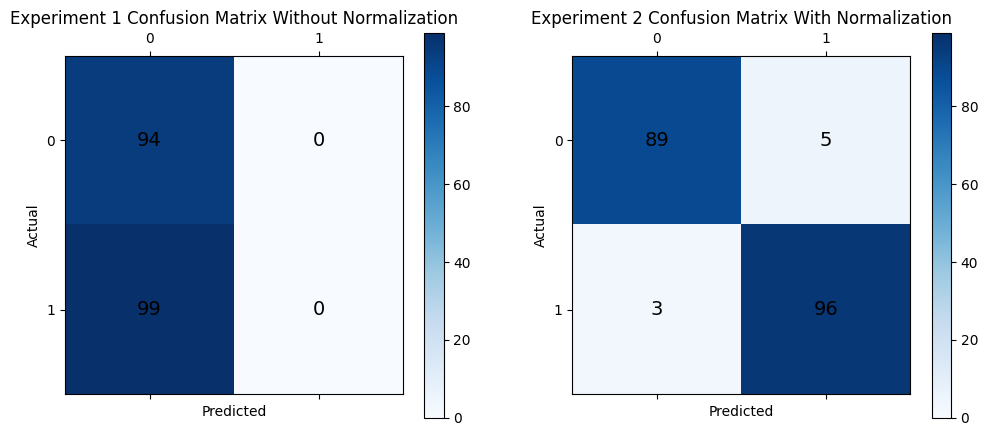

In [ ]:
# Define the confusion matrices
confusion_matrix_exp1 = np.array([[94, 0], [99, 0]])
confusion_matrix_exp2 = np.array([[89, 5], [3, 96]])

# Define the scores
scores = ['94', '0', '89', '5'], ['99', '0', '3', '96']

# Create subplots for Experiment 1 and Experiment 2
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the confusion matrix for Experiment 1
cax1 = axes[0].matshow(confusion_matrix_exp1, cmap='Blues', vmin=0, vmax=99)
axes[0].set_title('Experiment 1 Confusion Matrix Without Normalization')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Add scores to the confusion matrix for Experiment 1
for i in range(2):
    for j in range(2):
        axes[0].text(j, i, scores[i][j], ha='center', va='center', color='black', fontsize=14)

plt.colorbar(cax1, ax=axes[0])

# Plot the confusion matrix for Experiment 2
cax2 = axes[1].matshow(confusion_matrix_exp2, cmap='Blues', vmin=0, vmax=99)
axes[1].set_title('Experiment 2 Confusion Matrix With Normalization')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Add scores to the confusion matrix for Experiment 2
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, scores[i][j+2], ha='center', va='center', color='black', fontsize=14)

plt.colorbar(cax2, ax=axes[1])

plt.show()

##Feature Importance

In [ ]:
# Create and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_normalized, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test_normalized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.9430051813471503

Confusion Matrix:
 [[88  6]
 [ 5 94]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94        94
           1       0.94      0.95      0.94        99

    accuracy                           0.94       193
   macro avg       0.94      0.94      0.94       193
weighted avg       0.94      0.94      0.94       193



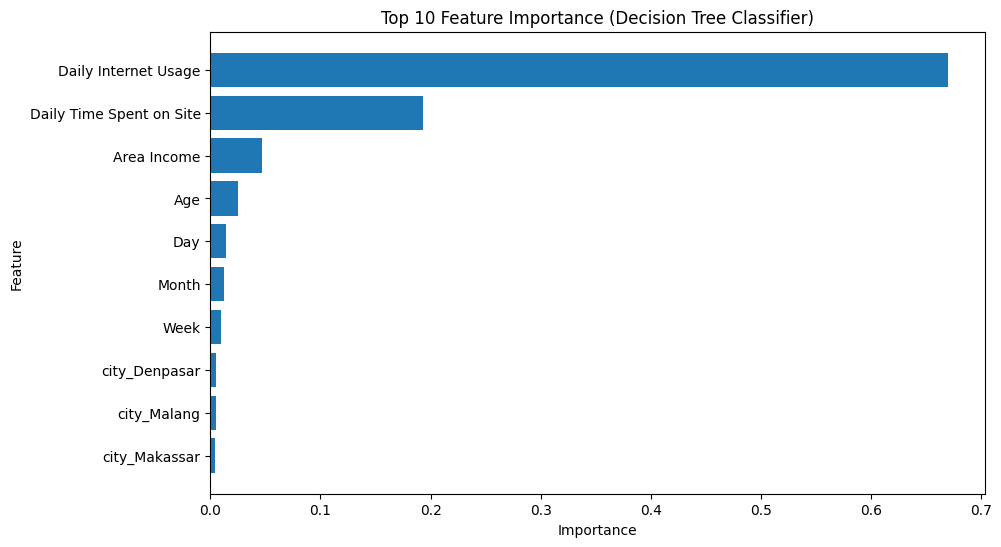

In [ ]:
# Get the feature importances
feature_importances = decision_tree.feature_importances_
feature_names = list(X.columns)

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top N features to display
top_N = 10  # Change this number as needed
top_features = feature_importance_df.head(top_N)

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_N} Feature Importance (Decision Tree Classifier)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

# **business Recommendation**

Business Recommendations based on Top 2 Feature Importance (Daily Internet Usage and Daily Time on Site):

1. **Optimize User Engagement**: The analysis has shown that user engagement on the website is a key driver for ad click-through rates. Consider strategies to enhance the user experience, such as personalized content, interactive features, and a responsive website design. By increasing the daily time spent on the site, you can improve the chances of users interacting with ads.

2. **Data-Driven Ad Placement**: Leverage data analytics to strategically place ads when users are most engaged. Ads placed during peak daily internet usage periods have a higher likelihood of being seen and clicked. Utilize machine learning models to predict optimal ad placement times and locations based on user behavior.

3. **Content Quality Improvement**: Focus on creating high-quality content and advertisements. Engaging content can lead to longer time spent on the site and increased daily internet usage. A balance of informative, entertaining, and relevant content can boost user engagement.

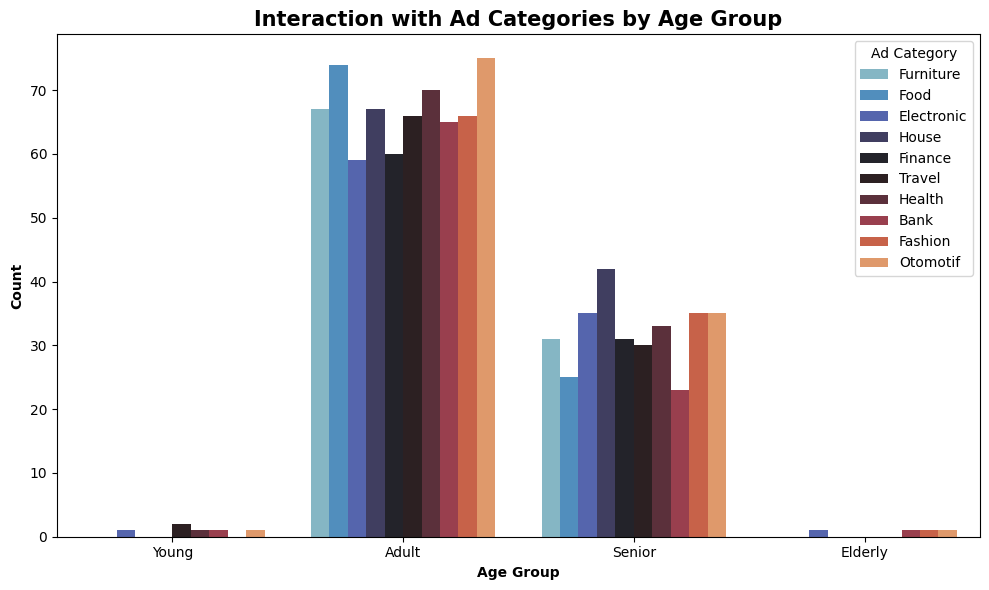

In [ ]:
# Settings for the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Define age groups and labels
age_bins = [15, 20, 40, 60, df['Age'].max()]
age_labels = ['Young', 'Adult', 'Senior', 'Elderly']

# Create a new column 'Age_Group' with labels
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Create a count plot
sns.countplot(data=df, x='Age_Group', hue='category', palette='icefire')
plt.title('Interaction with Ad Categories by Age Group', fontsize=15, fontweight='bold')
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

# Show the plot
plt.legend(title='Ad Category')
plt.tight_layout()
plt.show()

**Business Recommendation Based on Age**

* **Target Adult and Senior Groups**: The marketing strategy should be primarily designed to target the "Adult" and "Senior" age groups since they make up the majority of users. Tailor advertisements, promotions, and content to resonate with the interests and preferences of these age groups.

* **Explore Opportunities**: While the "Young" and "Elderly" groups are smaller in number, they still represent potential market segments. It may be worth exploring specific strategies to attract and engage these demographics, considering their unique interests and needs.

# **Business Simulation**

**Company Profile: CarMend Pro 🚗🔧**

CarMend Pro is a customer-focused automotive services company specializing in car maintenance and repair. We connect car owners with trusted mechanics, offering convenient and reliable solutions to keep their vehicles in top condition. Our transparent pricing, user-friendly platform, and dedication to innovation make us a leader in the automotive industry. 🌟💼


1. **Marketing Team Target: 🎯**


* Objective:
To drive traffic to the CarMend Pro website, generate interest in our services, and increase sales. 🚗💻📈


* Target Audience: 🎯
Car owners looking for automotive maintenance and repair services. 🚗🔧💡


2. **Assumed Clicked Customers: 🖱️**

Interested Prospects (Assumed 30%): 🤩

* Clicked on the ad and visited the website.
* Spent more time on the site, viewed multiple pages.
* Engaged with interactive tools like the "Price Estimator."

Non-Interested Prospects (Assumed 70%): 😕
* Clicked on the ad but didn't engage much.
* Bounced quickly from the landing page.

Marketing Team's Assumed Clicked Customers: 📊
* Clicks: 193
* Interested Prospects (30% of clicks): 58
* Non-Interested Prospects (70% of clicks): 135

3. **Comparison Result**

Marketing Team's Expected Results:
* Total Conversions: 58 (assuming all 58 interested prospects converted).
* Total Revenue Sales: 11,600 (58 conversions x 200 average transaction value).
* Conversion Rate (CVR): 100% (since all expected interested prospects are assumed to convert).

Machine Learning Model's Results:
* Total Conversions: 182 (as previously mentioned).
* Total Revenue Sales: $36,400 (as previously mentioned).
* Conversion Rate (CVR): Approximately 94.3% (as previously mentioned).

In [2]:
# Marketing Team's Expected Results
marketing_expected_conversions = 58
marketing_expected_cvr = 100  # 100% CVR for interested prospects
marketing_expected_avg_transaction_value = 200
marketing_expected_revenue = marketing_expected_conversions * marketing_expected_avg_transaction_value

# Machine Learning Model's Results
ml_total_conversions = 182  # Example where ML result is lower
ml_total_revenue = ml_total_conversions * marketing_expected_avg_transaction_value

# Check if Marketing Team Matches or Outperforms Machine Learning
if ml_total_revenue > marketing_expected_revenue:
    revenue_difference = ml_total_revenue - marketing_expected_revenue
    print("🚀 Machine Learning Model Outperforms Marketing Team's Expectation!")
    print(f"Machine Learning Model generates an additional ${revenue_difference:,} in revenue.")
elif ml_total_revenue < marketing_expected_revenue:
    revenue_difference = marketing_expected_revenue - ml_total_revenue
    print("🙅‍♂️ Marketing Team's Expectation Outperforms Machine Learning Result!")
    print(f"Marketing Team's expected revenue exceeds the ML prediction by ${revenue_difference:,}.")
else:
    print("🤝 Marketing Team's Expectation Matches Machine Learning Result.")

🚀 Machine Learning Model Outperforms Marketing Team's Expectation!
Machine Learning Model generates an additional $24,800 in revenue.


**Marketing Team's Expected Results:**

* marketing_expected_conversions: Represents the number of expected conversions based on the marketing team's assumptions. In this case, the marketing team anticipates 58 conversions.
* marketing_expected_cvr: The assumed Conversion Rate (CVR) for interested prospects. The value is set to 100%, meaning that the marketing team expects every interested prospect to convert into a customer.
* marketing_expected_avg_transaction_value: Represents the expected average transaction value, which is the assumed average amount spent by each customer.  

In this case, the marketing team expects an average transaction value of $200$.
marketing_expected_revenue: Calculated by multiplying the number of expected conversions (58) by the assumed average transaction value ($200$), resulting in the expected total revenue, which is $11,600.

**Machine Learning Model's Results:**

* ml_total_conversions: Represents the total number of conversions predicted by the machine learning model. In this scenario, the ML model predicts 182 conversions based on its analysis.
* ml_total_revenue: Calculated by multiplying the total conversions predicted by the machine learning model (182) by the same assumed average transaction value $200$, resulting in a total revenue of $36,400 based on the ML model's predictions.